Topic: Challenge Set 7  
Subject: Classification Problems   
Date: 10/22/2018  
Name: Emma Huang  

In [103]:
# libraries
import pandas as pd
import numpy as np

import io
import requests
import operator

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.learning_curve import learning_curve
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
# Load the vote data into a dataframe
s=requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data").content
df=pd.read_csv(io.StringIO(s.decode('utf-8')),header=None)

Dataframe Columns:  
0. Class Name: 2 (democrat, republican)
1. handicapped-infants: 2 (y,n)
2. water-project-cost-sharing: 2 (y,n)
3. adoption-of-the-budget-resolution: 2 (y,n)
4. physician-fee-freeze: 2 (y,n)
5. el-salvador-aid: 2 (y,n)
6. religious-groups-in-schools: 2 (y,n)
7. anti-satellite-test-ban: 2 (y,n)
8. aid-to-nicaraguan-contras: 2 (y,n)
9. mx-missile: 2 (y,n)
10. immigration: 2 (y,n)
11. synfuels-corporation-cutback: 2 (y,n)
12. education-spending: 2 (y,n)
13. superfund-right-to-sue: 2 (y,n)
14. crime: 2 (y,n)
15. duty-free-exports: 2 (y,n)
16. export-administration-act-south-africa: 2 (y,n)

In [93]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


# Challenge 1

In [94]:
# Replace 'y's with 1s, 'n's with 0s
df.replace({'n': 0, 'y': 1},inplace=True)

In [95]:
# get counts of 0 & 1 for each column
counts = df.apply(pd.value_counts)

In [96]:
# make a list of probabilities
vote_probs = []
for item in range(1,17):
    vote_probs.append(counts[item][1]/(counts[item][1]+counts[item][0]))

In [97]:
# replace the "?"s with probabilities
for item in range(1,17):
    df[item].replace({'?': vote_probs[item-1]},inplace=True)

In [98]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


# Challenge 2

In [99]:
# Split the data into a test and training set
X=df.loc[:,df.columns != 0]
y=df[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=4444)

# Challenge 3

In [10]:
# Create a dictionary with the k value as the key and the test accuracy as the value
k_dict = {}
for item in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=item)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    k_dict[item] = accuracy_score(y_test, y_pred)

In [11]:
# Find the k value that returns the highest accuracy
max(k_dict.items(), key=operator.itemgetter(1))[0]

6

In [12]:
#  Accuracy at k = 8
k_dict[8]

0.9236641221374046

In [13]:
# All accuracies of 0.9312977099236641
[k for k,v in k_dict.items() if v == 0.9312977099236641]

[6, 9, 10]

The k values with the highest accuracies are [8, 9, 11, 13, 14, 15, 16, 17] (they have the exact same accuracy of 0.9313)

# Challenge 4

In [14]:
# Make a model with LogisticRegression
lm1 = LogisticRegression(C=1000)
lm1.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
# Calculate test accuracy
y_pred = lm1.predict(X_test)
log_acc = accuracy_score(y_test, y_pred)
log_acc

0.9312977099236641

This is slightly higher than the KNN accuracy

# Challenge 5

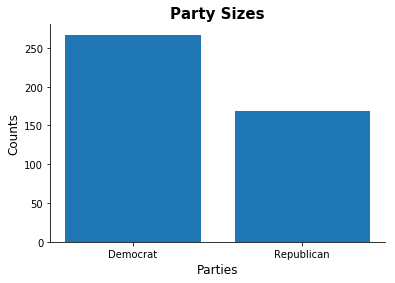

In [16]:
# Plot party counts
plt.bar(['Democrat','Republican'],[counts[0]['democrat'], counts[0]['republican']])
plt.title('Party Sizes', fontsize = 15, weight = 'bold')
plt.ylabel('Counts', fontsize = 12)
plt.xlabel('Parties', fontsize = 12)
sns.despine();

There are 267 democrats and 168 republicans

In [17]:
# function that returns a list of democrats
def democrat(matrix):
    number = matrix.shape[0]
    dem_list = ['democrat'] * number
    return dem_list

In [18]:
# find the accuracy of just predicting every party member as democrat
y_predicted = democrat(df)
dem_acc = accuracy_score(df[0], y_predicted)
dem_acc

0.6137931034482759

In [19]:
# function that returns a list of republicans
def republican(matrix):
    number = matrix.shape[0]
    dem_list = ['republican'] * number
    return dem_list

In [20]:
# find the accuracy of just predicting every party member as republican
y_predicted = republican(df)
rep_acc = accuracy_score(df[0], y_predicted)
rep_acc

0.38620689655172413

These scores are the same as taking the count of the party divided by the total counts (and add up to 1 of course)

# Challenge 6

In [21]:
lists = sorted(k_dict.items())
x, y1 = zip(*lists)
y2 = [log_acc] * 20
y3 = [dem_acc]* 20
y4 = [rep_acc]* 20

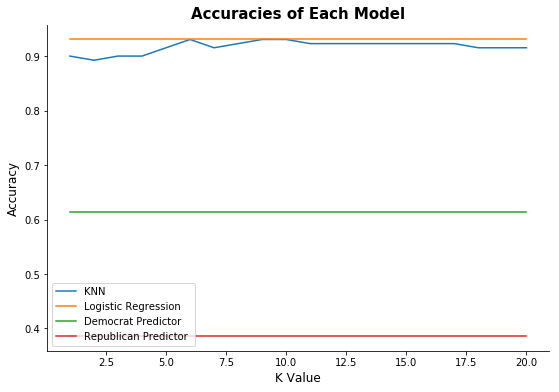

In [22]:
plt.figure(figsize = [9,6])

plt.plot(x, y1, label = 'KNN')
plt.plot(x, y2, label = 'Logistic Regression')
plt.plot(x, y3, label = 'Democrat Predictor')
plt.plot(x, y4, label = 'Republican Predictor ')

plt.title('Accuracies of Each Model', fontsize = 15, weight = 'bold')
plt.xlabel('K Value', fontsize = 12)
plt.ylabel('Accuracy', fontsize = 12)
plt.legend()
sns.despine();

# Challenge 7

In [23]:
log_curve = learning_curve(lm1, X, y, train_sizes = np.linspace(0.05, 1.0, 25))

In [24]:
log_train_cv_err = np.mean(log_curve[1], axis=1)
log_test_cv_err = np.mean(log_curve[2], axis=1)
log_m = log_curve[0]

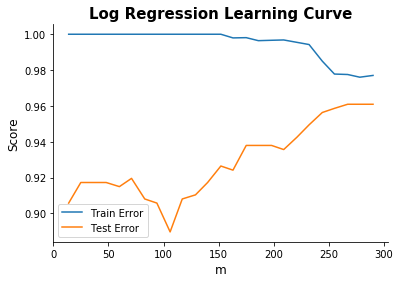

In [25]:
plt.plot(log_m, log_train_cv_err, label = 'Train Error')
plt.plot(log_m, log_test_cv_err, label = 'Test Error')

plt.title('Log Regression Learning Curve', fontsize = 15, weight = 'bold')
plt.xlabel('m', fontsize = 12)
plt.ylabel('Score', fontsize = 12)
plt.legend()
sns.despine();

In [26]:
knn = KNeighborsClassifier(n_neighbors=8)
knn_curve = learning_curve(knn, X, y, train_sizes = np.linspace(0.05, 1.0, 25))

In [27]:
knn_train_cv_err = np.mean(knn_curve[1], axis=1)
knn_test_cv_err = np.mean(knn_curve[2], axis=1)
knn_m = knn_curve[0]

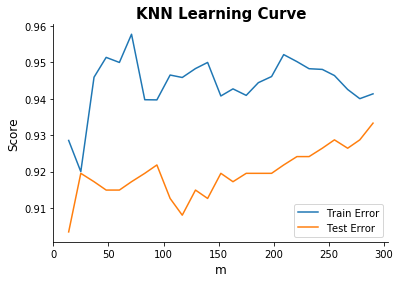

In [28]:
plt.plot(knn_m, knn_train_cv_err, label = 'Train Error')
plt.plot(knn_m, knn_test_cv_err, label = 'Test Error')

plt.title('KNN Learning Curve', fontsize = 15, weight = 'bold')
plt.xlabel('m', fontsize = 12)
plt.ylabel('Score', fontsize = 12)
plt.legend()
sns.despine();

# Challenge 8

In [29]:
# Make a model with Gaussian Naive Bayes
Gaus = GaussianNB()
Gaus.fit(X_train, y_train)
# Calculate test accuracy
y_pred = Gaus.predict(X_test)
Gaus_acc = accuracy_score(y_test, y_pred)
Gaus_acc

0.9389312977099237

In [30]:
# Make a model with SVM Classifier
SVC = SVC()
SVC.fit(X_train, y_train)
# Calculate test accuracy
y_pred = SVC.predict(X_test)
SVC_acc = accuracy_score(y_test, y_pred)
SVC_acc

0.9541984732824428

In [31]:
# Make a model with a Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
# Calculate test accuracy
y_pred = tree.predict(X_test)
tree_acc = accuracy_score(y_test, y_pred)
tree_acc

0.9465648854961832

In [102]:
# Make a model with Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# Calculate test accuracy
y_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
rf_acc

0.9541984732824428

# Challenge 9

In [33]:
# KNN
knn_mean_score = cross_val_score(knn, X, y, cv=10).mean()
knn_mean_score

0.9352839021443673

In [34]:
# Log Regression
log_mean_score = cross_val_score(lm1, X, y, cv=10).mean()
log_mean_score

0.9560656397865699

In [35]:
# Gaussian Naive Bayes
Gaus_mean_score = cross_val_score(Gaus, X, y, cv=10).mean()
Gaus_mean_score

0.9397739857042182

In [36]:
# SVM Classifier
SVC_mean_score = cross_val_score(SVC, X, y, cv=10).mean()
SVC_mean_score

0.9582804792107119

In [37]:
# Decision Tree
tree_mean_score = cross_val_score(tree, X, y, cv=10).mean()
tree_mean_score

0.9353417899929528

In [38]:
# Random Forest
rf_mean_score = cross_val_score(rf, X, y, cv=10).mean()
rf_mean_score

0.9375616631430586

# Challenge 10

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [39]:
# Reload the dataframe
df2=pd.read_csv(io.StringIO(s.decode('utf-8')),header=None)

In [40]:
# Replace 'y's with 1s, 'n's with 0s
df2.replace({'n': 0, 'y': 1},inplace=True)

In [41]:
# Get the counts of each row
counts2 = df2.apply(pd.value_counts)
counts2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
democrat,267.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
republican,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,236.0,192.0,171.0,247.0,208.0,152.0,182.0,178.0,206.0,212.0,264.0,233.0,201.0,170.0,233.0,62.0
1,NaN,187.0,195.0,253.0,177.0,212.0,272.0,239.0,242.0,207.0,216.0,150.0,171.0,209.0,248.0,174.0,269.0
?,NaN,12.0,48.0,11.0,11.0,15.0,11.0,14.0,15.0,22.0,7.0,21.0,31.0,25.0,17.0,28.0,104.0


In [42]:
# Convert the "?"s to the mode of the column
for item in range(1,17):
    if counts2[item][0] > counts2[item][1]:
        df2[item].replace({'?': 0},inplace=True)
    else:
        df2[item].replace({'?': 1},inplace=True)

In [43]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [44]:
X2=df2[[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]
y2=df2[1]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30,random_state=4444)

In [45]:
# Make a model with LogisticRegression
lm2 = LogisticRegression(C=1000)
lm2.fit(X2_train, y2_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
# Cross validatation score
cross_val_score(lm2, X2, y2, cv=10).mean()

0.6873552803785362

# Challenge 11

In [47]:
# Read in dataframe
movie_df = pd.read_csv('2013_movies.csv')
movie_df['ReleaseDate'] = pd.to_datetime(movie_df['ReleaseDate'])

In [48]:
movie_df.describe()

,Budget,DomesticTotalGross,Runtime
count,8.900000e+01,1.000000e+02,100.000000
mean,7.474719e+07,1.005969e+08,112.260000
std,5.941692e+07,8.739641e+07,18.190696
min,2.500000e+06,2.556825e+07,75.000000
25%,2.800000e+07,4.270413e+07,98.000000
50%,5.500000e+07,6.954237e+07,112.000000
75%,1.100000e+08,1.204759e+08,123.000000
max,2.250000e+08,4.246680e+08,180.000000


In [49]:
# Replace budget Nones with the mean value
movie_df['Budget'].replace({None: 74747000},inplace=True)

In [50]:
# Counts for each rating
rating_counts = movie_df.groupby(['Rating'],as_index=False)['Title'].count()

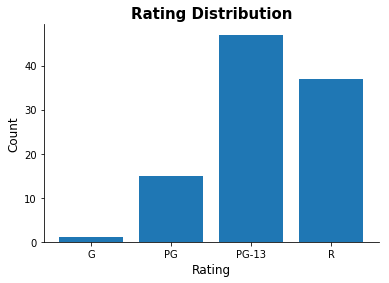

In [51]:
# Make a bar graph of how many of each movie there is in the data
plt.bar(rating_counts['Rating'],rating_counts['Title'])
plt.title('Rating Distribution', fontsize = 15, weight = 'bold')
plt.xlabel('Rating', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
sns.despine();

In [52]:
# Split the data into a test and training set
Xmov=movie_df[['Budget','DomesticTotalGross','Runtime']]
ymov=movie_df['Rating']
Xmov_train, Xmov_test, ymov_train, ymov_test = train_test_split(Xmov, ymov, test_size=0.30,random_state=4444)

In [53]:
# Create a dictionary with the k value as the key and the test accuracy as the value
mov_k_dict = {}
for item in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=item)
    knn.fit(Xmov_train, ymov_train)
    y_pred = knn.predict(Xmov_test)
    mov_k_dict[item] = accuracy_score(ymov_test, y_pred)

In [54]:
# Find the k value that returns the highest accuracy
max(mov_k_dict.items(), key=operator.itemgetter(1))[0]

1

In [55]:
# All accuracies of 0.6
[k for k,v in mov_k_dict.items() if v == 0.6]

[1, 3]

KNN with clusters of 3 is the best predictor at 0.6 accuracy

In [56]:
# Make a model with LogisticRegression
log_mov = LogisticRegression(C=1000)
log_mov.fit(Xmov_train, ymov_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
# Calculate test accuracy
y_pred = log_mov.predict(Xmov_test)
accuracy_score(ymov_test, y_pred)

0.4666666666666667

In [58]:
# function that returns a list of PG-13 (the most common rating)
def rating(matrix):
    number = matrix.shape[0]
    rate_list = ['PG-13'] * number
    return rate_list

In [59]:
# find the accuracy of just predicting every rating as PG-13
y_predicted = rating(movie_df)
accuracy_score(movie_df['Rating'], y_predicted)

0.47

KNN predicts the rating 13% better than the baseline, while the logistic regression predicts slightly worse.

In [60]:
log_mov.coef_, log_mov.intercept_ 

(array([[-8.50267845e-08,  1.97085226e-09, -1.87685467e-12],
        [-5.97341498e-09, -8.80561462e-09, -9.87494626e-14],
        [ 6.56358534e-09, -3.87137419e-09, -2.07959261e-14],
        [-1.39449822e-08,  2.31395337e-09,  7.60797628e-14]]),
 array([-1.76437846e-14, -8.48316501e-16, -2.97835007e-16,  6.96951401e-16]))

It seems as if the log regression returned 4 models, and in each model the coefficents and intercept seem to change quite drastically, indicating that this model is not a very good one. Theoretically we could use the coefficients to find the features most important to the model, but I wouldn't do so in this case.

# Challenge 12 

In [61]:
# Load the cancer data into a dataframe
s = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data").content
cancerdf = pd.read_csv(io.StringIO(s.decode('utf-8')),header=None)

Attribute Information:
   0. Age of patient at time of operation (numerical)
   1. Patient's year of operation (year - 1900, numerical)
   2. Number of positive axillary nodes detected (numerical)
   3. Survival status (class attribute)  
         1 = the patient survived 5 years or longer  
         2 = the patient died within 5 year

In [62]:
cancerdf.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [63]:
# What is the average and standard deviation of the age of all of the patients?

In [64]:
cancerdf.describe()

,0,1,2,3
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


The average age is 52.46 and the standard deviation is 10.80

In [65]:
# What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?  

In [66]:
cancerdf.groupby([3]).describe()

0                                                          1  \
   count       mean        std   min   25%   50%   75%   max  count   
3                                                                     
1  225.0  52.017778  11.012154  30.0  43.0  52.0  60.0  77.0  225.0   
2   81.0  53.679012  10.167137  34.0  46.0  53.0  61.0  83.0   81.0   

              ...                   2                                     \
        mean  ...    75%   max  count      mean       std  min  25%  50%   
3             ...                                                          
1  62.862222  ...   66.0  69.0  225.0  2.791111  5.870318  0.0  0.0  0.0   
2  62.827160  ...   65.0  69.0   81.0  7.456790  9.185654  0.0  1.0  4.0   

               
    75%   max  
3              
1   3.0  46.0  
2  11.0  52.0  

[2 rows x 24 columns]

For patients that survived 5 or more years after surgury, the average age is 52.02 and the standard deviation is 11.01

In [67]:
# What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?

For patients that survived less than 5 years after surgury, the average age is 53.68 and the standard deviation is 10.17

In [68]:
#Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.

In [69]:
is_one = cancerdf[3] == 1
survived = cancerdf[is_one]

In [70]:
# Sorry if "died" is too morbid
is_two = cancerdf[3] == 2
died = cancerdf[is_two]

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


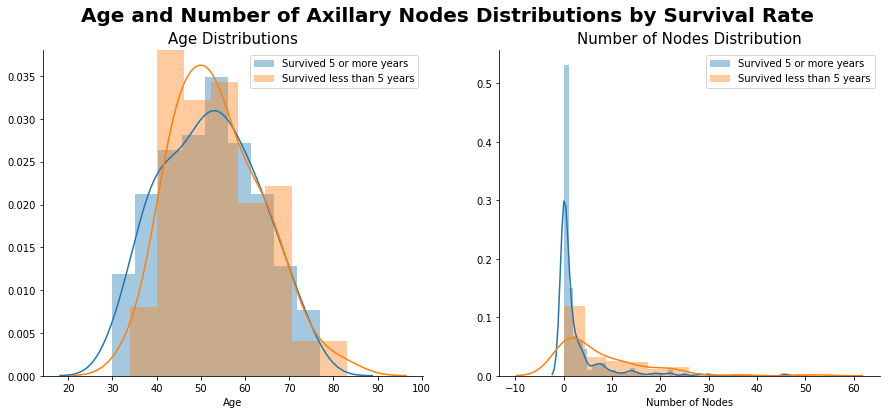

In [71]:
plt.figure(figsize=[15,6])
plt.suptitle('Age and Number of Axillary Nodes Distributions by Survival Rate',fontsize = 20, weight = 'bold')

plt.subplot(1,2,1)
sns.distplot(survived[0], label = "Survived 5 or more years")
sns.distplot(died[0], label = "Survived less than 5 years")
plt.title('Age Distributions', fontsize = 15)
plt.xlabel('Age', fontsize = 10)
plt.legend()

plt.subplot(1,2,2)
sns.distplot(survived[2], label = "Survived 5 or more years")
sns.distplot(died[2], label = "Survived less than 5 years")
plt.title('Number of Nodes Distribution', fontsize = 15)
plt.xlabel('Number of Nodes', fontsize = 10)
plt.legend()

sns.despine();

In [72]:
# What is the earliest year of surgery in this dataset?

1958

In [73]:
# What is the most recent year of surgery? 

1969

In [74]:
# Use logistic regression to predict survival after 5 years. How well does your model do?

In [75]:
# Split the data into a test and training set
Xcan=cancerdf[[0,1,2]]
ycan=cancerdf[3]
Xcan_train, Xcan_test, ycan_train, ycan_test = train_test_split(Xcan, ycan, test_size=0.30,random_state=4444)

In [76]:
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(Xcan_train)
X_test_scaled = std_scale.fit_transform(Xcan_test)

In [77]:
# Make a model with LogisticRegression
log_can = LogisticRegression(C=1000)
log_can.fit(X_train_scaled, ycan_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
# Calculate test accuracy
y_pred = log_can.predict(X_test_scaled)
accuracy_score(ycan_test, y_pred)

0.8369565217391305

This model does pretty well (it predicted correctly 83% of the time on the test data)

In [79]:
# What are the coefficients of logistic regression? Which features affect the outcome how?  

In [80]:
log_can.coef_, log_can.intercept_ 

(array([[0.18140766, 0.02080515, 0.57552138]]), array([-0.91430671]))

It seems as if all of the features decrease the probability of survival. The number of nodes is by far the largest indicator though. An increase in nodes will mean it's far more likely that the patient wont survive 5 years past surgery

In [81]:
# Draw the learning curve for logistic regression in this case.

In [82]:
curve = learning_curve(log_can, Xcan, ycan, train_sizes = np.linspace(0.05, 1.0, 25))

In [83]:
train_cv_err = np.mean(curve[1], axis=1)
test_cv_err = np.mean(curve[2], axis=1)
m = curve[0]

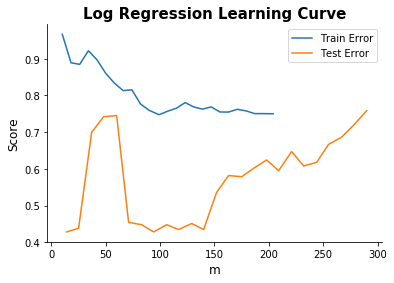

In [84]:
plt.plot(m, train_cv_err, label = 'Train Error')
plt.plot(log_m, test_cv_err, label = 'Test Error')

plt.title('Log Regression Learning Curve', fontsize = 15, weight = 'bold')
plt.xlabel('m', fontsize = 12)
plt.ylabel('Score', fontsize = 12)
plt.legend()
sns.despine();